<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Hyperparameter Tuning

## *Data Science Unit 4 Sprint 2 Assignment 4*

## Your Mission, should you choose to accept it...

To hyperparameter tune and extract every ounce of accuracy out of this telecom customer churn dataset: <https://drive.google.com/file/d/1dfbAsM9DwA7tYhInyflIpZnYs7VT-0AQ/view> 

## Requirements

- Load the data
- Clean the data if necessary (it will be)
- Create and fit a baseline Keras MLP model to the data.
- Hyperparameter tune (at least) the following parameters:
 - batch_size
 - training epochs
 - optimizer
 - learning rate (if applicable to optimizer)
 - momentum (if applicable to optimizer)
 - activation functions
 - network weight initialization
 - dropout regularization
 - number of neurons in the hidden layer
 
 You must use Grid Search and Cross Validation for your initial pass of the above hyperparameters
 
 Try and get the maximum accuracy possible out of this data! You'll save big telecoms millions! Doesn't that sound great?


In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
 
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [23]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/JimKing100/DS-Unit-4-Sprint-2-Neural-Networks/master/module4-Hyperparameter-Tuning/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
df.SeniorCitizen.replace([0, 1], ["No", "Yes"], inplace= True)
df.TotalCharges.replace([" "], ["0"], inplace= True)
df.TotalCharges = df.TotalCharges.astype(float)
df.drop("customerID", axis= 1, inplace= True)
df.Churn.replace(["Yes", "No"], [1, 0], inplace= True)
data = pd.get_dummies(df)

In [25]:
data.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [26]:
target = "Churn"
X = data.drop(target, axis= 1)
y = data.Churn

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 500)
X_train.shape

(5634, 46)

In [30]:
model = Sequential()
model.add(Dense(16, input_dim=46, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(1, activation='sigmoid'))
          
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=['accuracy'])

W0205 19:06:57.196863 4657737152 deprecation.py:506] From /Users/JKMacBook/opt/anaconda3/envs/NN/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0205 19:06:57.776187 4657737152 deprecation.py:323] From /Users/JKMacBook/opt/anaconda3/envs/NN/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [31]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=10)

Train on 5634 samples, validate on 1409 samples
Epoch 1/40
5634/5634 [==============================] - 5s 905us/sample - loss: 24.6462 - acc: 0.6720 - val_loss: 3.0312 - val_acc: 0.7502
Epoch 2/40
5634/5634 [==============================] - 4s 650us/sample - loss: 2.9724 - acc: 0.6849 - val_loss: 0.5369 - val_acc: 0.7530
Epoch 3/40
5634/5634 [==============================] - 5s 802us/sample - loss: 0.8776 - acc: 0.6928 - val_loss: 0.5307 - val_acc: 0.7864
Epoch 4/40
5634/5634 [==============================] - 6s 979us/sample - loss: 0.5740 - acc: 0.7593 - val_loss: 0.5530 - val_acc: 0.7779
Epoch 5/40
5634/5634 [==============================] - 6s 1ms/sample - loss: 0.5374 - acc: 0.7678 - val_loss: 0.4892 - val_acc: 0.7921
Epoch 6/40
5634/5634 [==============================] - 4s 796us/sample - loss: 0.5203 - acc: 0.7668 - val_loss: 0.4800 - val_acc: 0.8077
Epoch 7/40
5634/5634 [==============================] - 5s 862us/sample - loss: 0.5128 - acc: 0.7691 - val_loss: 0.4616 - val

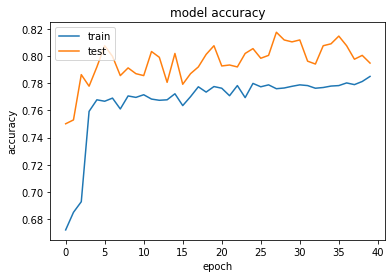

In [32]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Stretch Goals:

- Try to implement Random Search Hyperparameter Tuning on this dataset
- Try to implement Bayesian Optimiation tuning on this dataset using hyperas or hyperopt (if you're brave)
- Practice hyperparameter tuning other datasets that we have looked at. How high can you get MNIST? Above 99%?
- Study for the Sprint Challenge
 - Can you implement both perceptron and MLP models from scratch with forward and backpropagation?
 - Can you implement both perceptron and MLP models in keras and tune their hyperparameters with cross validation?